<a href="https://colab.research.google.com/github/cesarrivera52/Concentracion2/blob/main/Algoritmos/Arbol/Arbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 0 **Procesamiento de DATOS**

In [2]:
import pandas as pd
from pandas import DataFrame

print("Datos de entrenamiento:")
entrenamiento = pd.read_csv('Diabetes-Entrenamiento.csv')

datos_entrenamiento = entrenamiento.drop('class',axis=1)
clases_entrenamiento = entrenamiento['class']
print(clases_entrenamiento.value_counts())

print("\nDatos de evaluación")
evaluacion = pd.read_csv('Diabetes-Clasificacion.csv')

datos_evaluacion = evaluacion.drop('class',axis=1)
clases_evaluacion = evaluacion['class']
print(clases_evaluacion.value_counts())

nombresAtributos=datos_entrenamiento.columns.values
print("\nNombres de los atributos:", nombresAtributos)

Datos de entrenamiento:
class
tested_negative    437
tested_positive    231
Name: count, dtype: int64

Datos de evaluación
class
tested_negative    63
tested_positive    37
Name: count, dtype: int64

Nombres de los atributos: ['preg' 'plas' 'pres' 'skin' 'insu' 'mass' 'pedi' 'age']


# Paso 1 **Generación del Modelo**

In [3]:
from sklearn.tree import DecisionTreeClassifier

# Datos del clasificador
# Parametros:
# Metrica(criterion) entropy, gini (defecto)
# max_depth: Profundidad del arbol
# min_samples_split: numero mínimo de instancias por modo
clasificador = DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

#### Generar modelo
modelo = clasificador.fit(datos_entrenamiento,clases_entrenamiento)

print(modelo)

DecisionTreeClassifier(criterion='entropy', min_samples_split=3)


In [4]:
###Visualizar el modelo (arbol)
### texto
from sklearn.tree import export_text
arbol = export_text(modelo, feature_names= nombresAtributos)
print(arbol)

|--- plas <= 123.50
|   |--- mass <= 26.40
|   |   |--- plas <= 106.50
|   |   |   |--- class: tested_negative
|   |   |--- plas >  106.50
|   |   |   |--- mass <= 22.95
|   |   |   |   |--- mass <= 22.75
|   |   |   |   |   |--- preg <= 9.50
|   |   |   |   |   |   |--- class: tested_negative
|   |   |   |   |   |--- preg >  9.50
|   |   |   |   |   |   |--- class: tested_positive
|   |   |   |   |--- mass >  22.75
|   |   |   |   |   |--- class: tested_positive
|   |   |   |--- mass >  22.95
|   |   |   |   |--- class: tested_negative
|   |--- mass >  26.40
|   |   |--- age <= 28.50
|   |   |   |--- mass <= 30.95
|   |   |   |   |--- preg <= 7.00
|   |   |   |   |   |--- class: tested_negative
|   |   |   |   |--- preg >  7.00
|   |   |   |   |   |--- class: tested_positive
|   |   |   |--- mass >  30.95
|   |   |   |   |--- insu <= 99.50
|   |   |   |   |   |--- plas <= 103.00
|   |   |   |   |   |   |--- age <= 23.50
|   |   |   |   |   |   |   |--- class: tested_negative
|   |   |

[Text(0.4293643552311436, 0.9705882352941176, 'plas <= 123.5\nentropy = 0.93\nsamples = 668\nvalue = [437.0, 231.0]\nclass = tested_negative'),
 Text(0.12393552311435523, 0.9117647058823529, 'mass <= 26.4\nentropy = 0.667\nsamples = 385\nvalue = [318, 67]\nclass = tested_negative'),
 Text(0.2766499391727494, 0.9411764705882353, 'True  '),
 Text(0.029197080291970802, 0.8529411764705882, 'plas <= 106.5\nentropy = 0.132\nsamples = 109\nvalue = [107, 2]\nclass = tested_negative'),
 Text(0.019464720194647202, 0.7941176470588235, 'entropy = 0.0\nsamples = 71\nvalue = [71, 0]\nclass = tested_negative'),
 Text(0.038929440389294405, 0.7941176470588235, 'mass <= 22.95\nentropy = 0.297\nsamples = 38\nvalue = [36, 2]\nclass = tested_negative'),
 Text(0.029197080291970802, 0.7352941176470589, 'mass <= 22.75\nentropy = 0.684\nsamples = 11\nvalue = [9, 2]\nclass = tested_negative'),
 Text(0.019464720194647202, 0.6764705882352942, 'preg <= 9.5\nentropy = 0.469\nsamples = 10\nvalue = [9, 1]\nclass = te

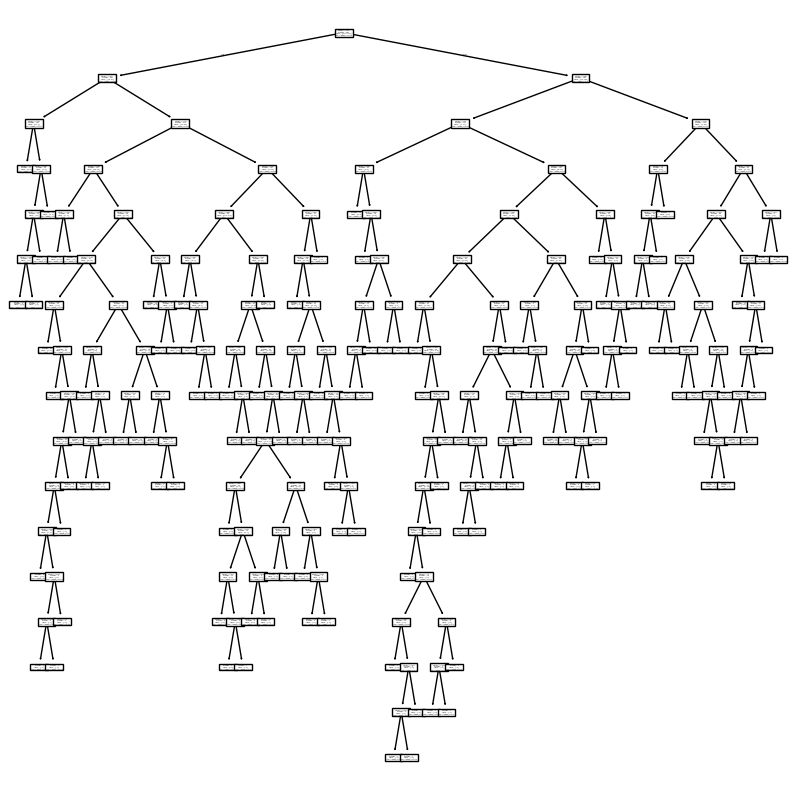

In [5]:
#grafico
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clasificador, feature_names= nombresAtributos, class_names=['tested_negative','tested_positive'])

# Paso 2 **Evaluación**

In [8]:
###### Clasificar las instancias del conjunto de evaluación ########
clase_asignada = modelo.predict(datos_evaluacion)
#ClaseAsignada clase otorgada por el modelo
#ClasesEvaluacion clase real


### Función de evaluación ######
from sklearn.metrics import accuracy_score


print("Exactitud:",accuracy_score(clase_asignada,clases_evaluacion))

Exactitud: 0.74


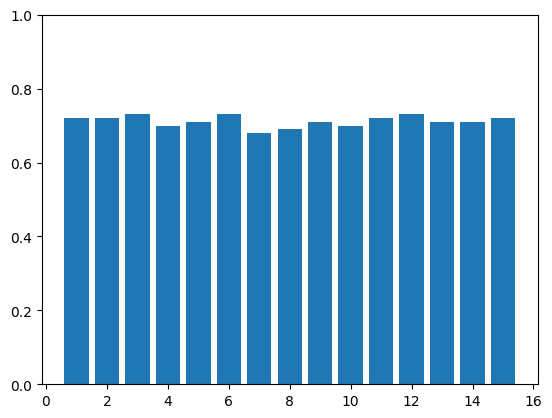

In [12]:
profundidad=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
exactitud=[]
for x in profundidad:
  clasificador=DecisionTreeClassifier(criterion='entropy', max_depth=x)


  ##### Generar modelo
  modelo=clasificador.fit(datos_entrenamiento,clases_entrenamiento)


  ### Clasificacion
  ClaseAsignada=modelo.predict(datos_evaluacion)


  ### Evaluar
  exactitud.append(accuracy_score(clases_evaluacion,ClaseAsignada))


import matplotlib.pyplot as plt
plt.bar(profundidad,exactitud)
plt.ylim(0,1)
plt.show()
